# 1. Introduction
Author: Adhang Muntaha Muhammad

[GitHub](https://github.com/adhang)
|
[LinkedIn](https://www.linkedin.com/in/adhangmuntaha/)
|
[Kaggle](https://www.kaggle.com/adhang)

## About This Project
I got this dataset from UCI Mahine Learning. This dataset contains information about iris flowers: Iris Setosa, Iris Versicolor, and Iris Virginica. In this dataset, iris flowers are classified by petal and sepal size (length & width). In this project, I want to use a machine learning model to classify iris flowers based on petal and sepal size.

## Objectives
- Dataset exploration
- Build a machine learning model using K-Nearest Neighbors (KNN) to predict iris species

## Dataset Description
This dataset contains 6 columns:
- `Id` - to identify each record
- Continuous data
    - `SepalLengthCm` - iris sepal length in centimeter
    - `SepalWidthCm` - iris sepal width in centimeter
    - `PetalLengthCm` - iris petal length in centimeter
    - `PetalWidthCm` - iris petal width in centimeter
- Categorical data
    - `Species` - iris species name

# 2. Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

sns.set_theme()

# 3. Reading Dataset
This dataset is in CSV format, we can use `pandas` to read this dataset.

In [2]:
data = pd.read_csv('/kaggle/input/iris/Iris.csv')

# check first 5 rows
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


There are 6 columns. But, we don't need the `Id` column. We can drop it.

In [3]:
data.drop('Id', axis=1, inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


I will change the column name, just for readability. It's just a personal preference.

In [4]:
column_name = {'SepalLengthCm':'sepal_len',
               'SepalWidthCm':'sepal_wd',
               'PetalLengthCm':'petal_len',
               'PetalWidthCm':'petal_wd',
               'Species':'species'
              }

data.rename(columns=column_name, inplace=True)
data.head()

,sepal_len,sepal_wd,petal_len,petal_wd,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 4. Data Exploration
Exploration on
- data type of each column
- number of records
- check missing values
- data distribution

## Data Information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wd   150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wd   150 non-null    float64
 4   species    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


We can see the data information using `info()`. But I will combine all data information to be a dataframe. Just for better visualization.

In [6]:
# check num of non-null data
data.count()

sepal_len    150
sepal_wd     150
petal_len    150
petal_wd     150
species      150
dtype: int64

In [7]:
# check data type
data.dtypes

sepal_len    float64
sepal_wd     float64
petal_len    float64
petal_wd     float64
species       object
dtype: object

In [8]:
# check total null values
data.isnull().sum()

sepal_len    0
sepal_wd     0
petal_len    0
petal_wd     0
species      0
dtype: int64

In [9]:
# check null values percentage
(data.isnull().sum()/data.shape[0])*100

sepal_len    0.0
sepal_wd     0.0
petal_len    0.0
petal_wd     0.0
species      0.0
dtype: float64

In [10]:
data_count = pd.DataFrame(data.count()).T.rename({0:'Non-null Count'})
data_type = pd.DataFrame(data.dtypes).T.rename({0:'Column Data Type'})
data_null = pd.DataFrame(data.isnull().sum()).T.rename({0:'Total Null Values'})
data_null_percentage = pd.DataFrame((data.isnull().sum()/data.shape[0])*100).T.rename({0:'Null Values Percentage'})

data_info = data_count.append([data_type, data_null, data_null_percentage])
data_info

,sepal_len,sepal_wd,petal_len,petal_wd,species
Non-null Count,150,150,150,150,150
Column Data Type,float64,float64,float64,float64,object
Total Null Values,0,0,0,0,0
Null Values Percentage,0.0,0.0,0.0,0.0,0.0


From this data information, we can see that there are no null values in this dataset. It's a good sign.

## Summary Statistic
Using `describe()`, we can see some descriptive statistics.

In [11]:
data.describe().round(2)

,sepal_len,sepal_wd,petal_len,petal_wd
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


## Data Distribution

### Distribution of Iris Species

In [12]:
data.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

The distribution of each species is equal. Nice. Another way to see the distribution of species:

In [13]:
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

### Histogram

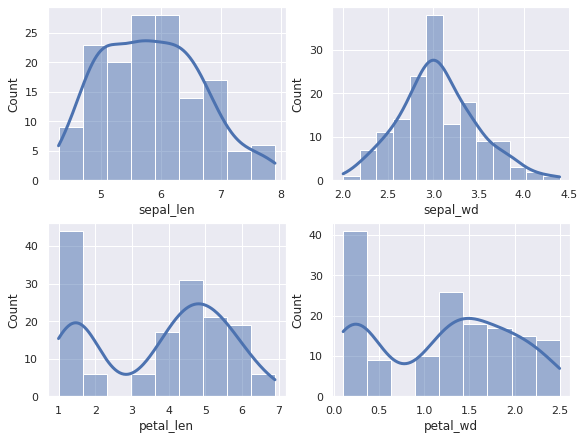

In [14]:
column_list = ['sepal_len', 'sepal_wd', 'petal_len', 'petal_wd']

fig, ax = plt.subplots(2,2, figsize=(8,6), constrained_layout=True)
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col_name in enumerate(column_list):
    sns.histplot(data=data, x=col_name, ax=axes_list[i], kde=True, line_kws={'linewidth':3})
plt.show()

### Boxplot

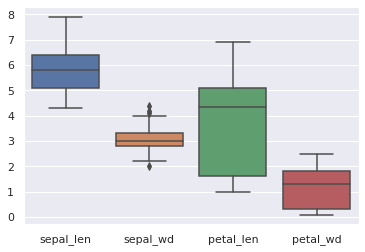

In [15]:
column_list = ['sepal_len', 'sepal_wd', 'petal_len', 'petal_wd']

sns.boxplot(data=data[column_list])
plt.show()

We can see some outliers on `sepal_wd`. For this project, I'm not going to handle this outliers.

### Pairplot

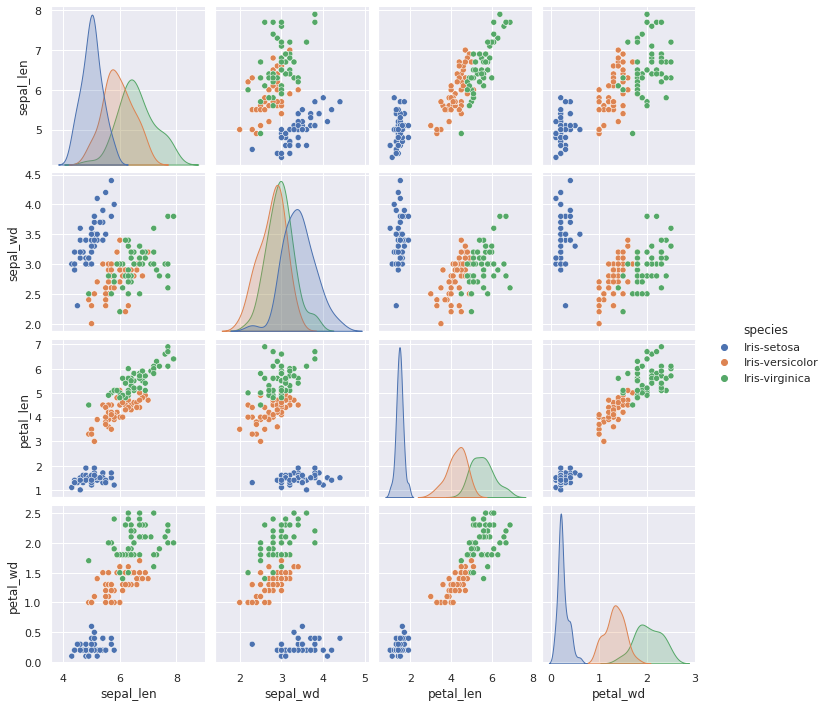

In [16]:
sns.pairplot(data, hue='species')
plt.show()

From this plot, we have a glimpse of how to classify iris species, right?

# 5. Data Preparation
For building machine learning model, I will use 2 scenario:
- Using 2 attributes
- Using all atributes

But I will use 2 attributes first.

## Attribute Selection
Based on the pairplot above, I will use `petal_len` and `petal_wd` since it has a good species separation.

In [17]:
column_list = ['sepal_len', 'sepal_wd', 'petal_len', 'petal_wd']

# using 2 attributes
X = data[['petal_len', 'petal_wd']]

# target
Y = data['species']

## Train - Test Split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

`stratify` parameter is used to make sure that the distribution of species on train and test set is similar.

In [19]:
print(Y_train.value_counts())
print()
print(Y_test.value_counts())

Iris-setosa        35
Iris-virginica     35
Iris-versicolor    35
Name: species, dtype: int64

Iris-virginica     15
Iris-setosa        15
Iris-versicolor    15
Name: species, dtype: int64


# 6. KNN Model

## Building the Model

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# use 5 neighors
knn = KNeighborsClassifier(n_neighbors=5)

# train the model
knn.fit(X_train, Y_train)

KNeighborsClassifier()

## Prediction

In [21]:
pred = knn.predict(X_test)

Let's check it manually, see the first 5 test data and predictions.

In [22]:
print(Y_test[:5].values)
print()
print(pred[:5])

['Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor']

['Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor']


The 4th prediction is not right. But it's okay. Let's see the model score.

# 7. Model Evaluation

## Accuracy

In [23]:
acc = knn.score(X_test, Y_test)
print(f'Accuracy: {(acc*100).round(2)}%')

Accuracy: 97.78%


In [24]:
# we can also use sklearn metrics
acc = accuracy_score(Y_test, pred)
print(f'Accuracy: {(acc*100).round(2)}%')

Accuracy: 97.78%


Using only 2 attributes can give 97.78% accuracy.

## Classification Report

In [25]:
print(classification_report(Y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



## Confusion Matrix
- Classification accuracy alone can be misleading if there is an unequal number of observations in each class or if there are more than two classes in the dataset. 
- Calculating a confusion matrix will provide a better idea of what the classification is getting right and what types of errors it is making.

Let's calculate the confusion matrix

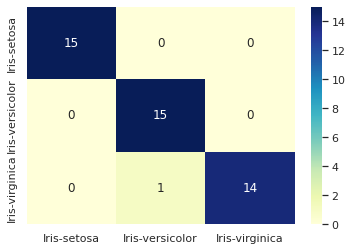

In [26]:
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cm = confusion_matrix(Y_test, pred, labels=species)

df_cm = pd.DataFrame(cm, index=species, columns=species)
sns.heatmap(df_cm, annot=True, cmap='YlGnBu')
plt.show()

# 8. Grid Search
Grid search is one method for tuning hyperparameter values. For KNN, we want to tune the number of neighbors. Would using grid search give better results? Let's see. Remember, this time I use only 2 attributes.

## Best Parameter

In [27]:
knn_2 = KNeighborsClassifier()

# create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors':np.arange(2,10)}

# use grid search to test all values for n_neighbors
knn_gscv = GridSearchCV(knn_2, param_grid, cv=5)

knn_gscv.fit(X, Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])})

What is the best value for `n_neighbors` parameter? And how is the score?

In [28]:
best_n = knn_gscv.best_params_['n_neighbors']
acc = knn_gscv.best_score_

print(f'Best n_neighbors: {best_n}')
print(f'Accuracy: {(acc*100).round(2)}%')

Best n_neighbors: 4
Accuracy: 96.67%


## Model with Best Parameter
Let's try to build our new KNN model using best parameter from grid search.

Accuracy: 97.78%


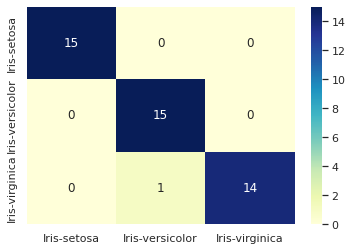

In [29]:
knn_gs = KNeighborsClassifier(n_neighbors=best_n)
knn_gs.fit(X_train, Y_train)
pred_gs = knn_gs.predict(X_test)

acc = knn_gs.score(X_test,Y_test)
print(f'Accuracy: {(acc*100).round(2)}%')

species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cm_gs = confusion_matrix(Y_test, pred_gs, labels=species)

df_cm_gs = pd.DataFrame(cm_gs, index=species, columns=species)
sns.heatmap(df_cm_gs, annot=True, cmap='YlGnBu')
plt.show()

Using grid search, our model performance is not improved.

# 9. Using All Attributes
We have tried to use 2 attributes and use grid search. But both can't get 100% accuracy. How about using all the attributes?

Accuracy: 97.78%


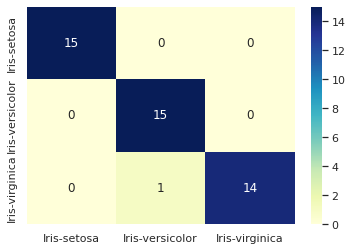

In [30]:
column_list = ['sepal_len', 'sepal_wd', 'petal_len', 'petal_wd']

X = data[column_list]
Y = data['species']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

# use 5 neighors
knn_all = KNeighborsClassifier(n_neighbors=5)

# train the model
knn_all.fit(X_train, Y_train)

pred_all = knn_all.predict(X_test)

acc = knn_all.score(X_test,Y_test)
print(f'Accuracy: {(acc*100).round(2)}%')

species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cm_all = confusion_matrix(Y_test, pred_all, labels=species)

df_cm_all = pd.DataFrame(cm_all, index=species, columns=species)
sns.heatmap(df_cm_all, annot=True, cmap='YlGnBu')
plt.show()

We still can't get 100% accuracy.

# 10. 100% Accuracy
Using KNN with 2 attributes or all attributes give the same result. We still can't reach 100% accuracy. I've seen other people works using KNN, some of them can get 100% accuracy. Some of them didn't use `stratify` parameter and use only 20% for the test set.

I've tried to not use `stratify` and use only 20% data for the test set. Yes it can give 100% accuracy, but in my opinion, it's not a really good thing since the model training is not using balanced species distribution. Want to try it?

Accuracy: 100.0%


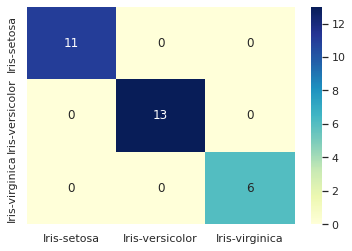

In [31]:
column_list = ['sepal_len', 'sepal_wd', 'petal_len', 'petal_wd']

X = data[column_list]
Y = data['species']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# use 5 neighors
knn_all = KNeighborsClassifier(n_neighbors=5)

# train the model
knn_all.fit(X_train, Y_train)
pred_all = knn_all.predict(X_test)

acc = knn_all.score(X_test,Y_test)
print(f'Accuracy: {(acc*100).round(2)}%')

species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cm_all = confusion_matrix(Y_test, pred_all, labels=species)

df_cm_all = pd.DataFrame(cm_all, index=species, columns=species)
sns.heatmap(df_cm_all, annot=True, cmap='YlGnBu')
plt.show()

You can see that the accuracy is 100%. But the species distribution is not balanced.

# 11. Closing
I can't get 100% accuracy using KNN. But 97.78% is not a bad performance. Maybe we can use another machine learning algorithm such as decision tree, SVM, or even neural network.

Anyway, thank you for reading this project. If you like this notebook, you can support me by giving an upvote :)